#**Profile**

**Nama : Huzaifah Alim**

**NIM : 0110221227**

**Prodi : Teknik Informatika**


**Judul : Mall Customer Segmentation Data Dengan Metode K Means Clustering**

Program ini dibuat sebagai pengumpulan tugas UAS mata kuliah **Data Mining** Semester 3 Kelas Jum'at yaitu teknik machine learning **Clustering** menggunakan metode **K Means Clustering** terhadap data **Mall Customer Segmentation Data**. Dataset yang saya gunakan bersumber dari Kaggle.com. Berikut linknya :
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

#**Import Library**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Kode di atas adalah import statement yang digunakan untuk memuat beberapa library yang dibutuhkan.

*   Library numpy digunakan untuk melakukan operasi matematika linier.
*   Library pandas digunakan untuk pengolahan data.
*   Library plotly.express digunakan untuk membuat visualisasi interaktif.
*   Library plotly.subplots digunakan untuk membuat subplot.
*   Library plotly.graph_objects digunakan untuk membuat objek grafik.
*   Library seaborn digunakan untuk membuat visualisasi estetis.
*   Library matplotlib.pyplot digunakan untuk membuat plot 2D.
*   Library warnings digunakan untuk menangani warning dari kode.
*   warnings.filterwarnings('ignore') digunakan untuk menonaktifkan warning.


In [2]:
df = pd.read_csv('Mall_Customers.csv')

Kode di atas digunakan untuk membaca file csv yang bernama 'Mall_Customers.csv' dan menyimpannya dalam variabel 'df' dengan menggunakan fungsi pd.read_csv() yang merupakan fungsi dari library pandas.

#**Pre-processing Data**


*   df.head() digunakan untuk menampilkan 5 baris pertama dari dataframe.
*   df.shape digunakan untuk menampilkan jumlah baris dan kolom dari dataframe.
*   df.isna().sum() digunakan untuk menampilkan jumlah data yang hilang (missing value) pada setiap kolom dari dataframe.
*   df.duplicated().sum() digunakan untuk menampilkan jumlah baris yang duplikat dari dataframe.
*   df.info() digunakan untuk menampilkan informasi umum dari dataframe, seperti jumlah baris, nama kolom, tipe data, dan jumlah data yang hilang.
*   df.describe() digunakan untuk menampilkan statistik deskriptif dari dataframe, seperti mean, standar deviasi, min, max, dan quartile dari setiap kolom numerik.

Semua kode di atas digunakan untuk mengecek dataframe sebelum dilakukan proses selanjutnya, seperti data cleaning (tetapi dalam data yang saat ini diolah kita tidak memperlukan cleaning data dikarenakan data tersebut tidak ada yang kosong), visualisasi, atau modeling.

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Keterangan** :

Gender = Jenis Kelamin

Age = Umur

Annual Income = Penghasilan Bersih

Spending Score = Spending score merupakan nilai yang diberikan oleh Mall kepada customer berbasarkan perilaku customer (waktu kunjungan,jenis barang yang dibeli, dan banyaknya uang yang dihabiskan dalam belanja) yang memiliki rentang nilai 1-100.

In [4]:
df.shape

(200, 5)

In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Feature Engineering**
Feature engineering adalah proses pengolahan data yang dilakukan untuk mengubah atau menambah fitur (feature) dari dataset agar sesuai dengan kebutuhan model yang akan digunakan. Dalam proses data mining, feature engineering merupakan tahap yang sangat penting karena kualitas dari fitur yang digunakan akan sangat mempengaruhi kualitas dari hasil yang didapat.


In [9]:
class FE:
    def __init__(self, df):
        self.df = df
        
    def rename_columns(self):
        self.df.columns = ['Id','Gender', 'Age', 'Income', 'SpendingScore']
        return self.df

    def convert_income(self):
        self.df.Income = self.df.Income.apply(lambda x: float(x * 1000))
        return self.df
        
    def convert_gender(self):
        self.df.Gender.replace({'Male':0, 'Female':1}, inplace=True)
        return self.df
        
    def run_all(self):
        self.rename_columns()
        self.convert_income()
        self.convert_gender()
        
        return self.df
    
fe = FE(df.copy())
cleaned_df = fe.run_all()




1.   Pertama, didefinisikan sebuah class bernama FE yang menerima parameter df saat diinstansiasi.
2.   Kemudian, di dalam class tersebut terdapat beberapa method yang digunakan untuk melakukan feature engineering, yaitu:

*   Method rename_columns() digunakan untuk mengubah nama kolom pada dataframe menjadi 'Id','Gender', 'Age', 'Income', 'SpendingScore'
*   Method rename_columns() digunakan untuk mengubah nama kolom pada dataframe menjadi 'Id','Gender', 'Age', 'Income', 'SpendingScore'
*   Method convert_income() digunakan untuk mengubah nilai income dalam dataframe dengan melakukan operasi penambahan 1000
*   Method convert_gender() digunakan untuk mengubah kolom gender dalam dataframe dengan menggantikan kategori 'Male' dengan 0 dan 'Female' dengan 1
*   Method run_all() digunakan untuk menjalankan semua method pada class FE secara bersamaan.

In [10]:
cleaned_df.head()

,Id,Gender,Age,Income,SpendingScore
0,1,0,19,15000.0,39
1,2,0,21,15000.0,81
2,3,1,20,16000.0,6
3,4,1,23,16000.0,77
4,5,1,31,17000.0,40


# **Visualisasi**

### Correlation

In [11]:
fig = px.imshow(cleaned_df.drop('Id', axis=1).corr())
fig.show()

Kode di atas digunakan untuk menampilkan heatmap dari korelasi antar fitur pada dataframe **cleaned_df**.

*   Pertama, digunakan fungsi drop() dari pandas dataframe untuk menghapus kolom 'Id' dari dataframe. Kemudian digunakan fungsi corr() untuk menghitung korelasi antar fitur pada dataframe yang sudah dibuang kolom 'Id' .
*   Selanjutnya, digunakan fungsi imshow() dari library plotly.express untuk membuat heatmap dari hasil korelasi yang dihitung sebelumnya.
*   Terakhir, digunakan fungsi show() untuk menampilkan heatmap yang sudah dibuat.

Heatmap ini digunakan untuk mengetahui hubungan antar fitur dalam dataframe, yang ditunjukkan dengan warna yang digunakan di dalam heatmap. Warna yang lebih terang menunjukkan korelasi yang lebih kuat antar fitur, sedangkan warna yang lebih gelap menunjukkan korelasi yang lebih lemah.

### Data Distribution

In [12]:
fig = make_subplots(cols=2, rows=2, subplot_titles=('Gender Distribution', 'Age Distribution', 'Income Distribution', 'SpendingScore Distribution'))
fig.update_layout(height=800)

fig.add_trace(go.Histogram(x=cleaned_df.Gender), row=1, col=1)
fig.add_trace(go.Histogram(x=cleaned_df.Age), row=1, col=2)
fig.add_trace(go.Histogram(x=cleaned_df.Income), row=2, col=1)
fig.add_trace(go.Histogram(x=cleaned_df.SpendingScore), row=2, col=2)

Kode di atas digunakan untuk membuat subplots dengan 4 histogram yang menampilkan distribusi dari fitur-fitur dalam dataframe **cleaned_df**.

*   Pertama, digunakan fungsi make_subplots() dari library plotly.subplots untuk membuat subplots dengan 2 kolom dan 2 baris, dan memberikan judul subplot masing-masing sebagai 'Gender Distribution', 'Age Distribution', 'Income Distribution', 'SpendingScore Distribution'
*   Kemudian, digunakan fungsi update_layout() untuk mengatur tinggi dari subplots sebagai 800 piksel.
*   Selanjutnya, digunakan fungsi add_trace() dari objek subplots yang dibuat sebelumnya untuk menambahkan histogram dari fitur-fitur 'Gender', 'Age', 'Income', dan 'SpendingScore' pada subplots yang sesuai. Fungsi go.Histogram() digunakan untuk membuat histogram dari setiap fitur.
*   Terakhir, digunakan fungsi show() untuk menampilkan subplots yang sudah dibuat.

### Data Distribution Berdasarkan Gender

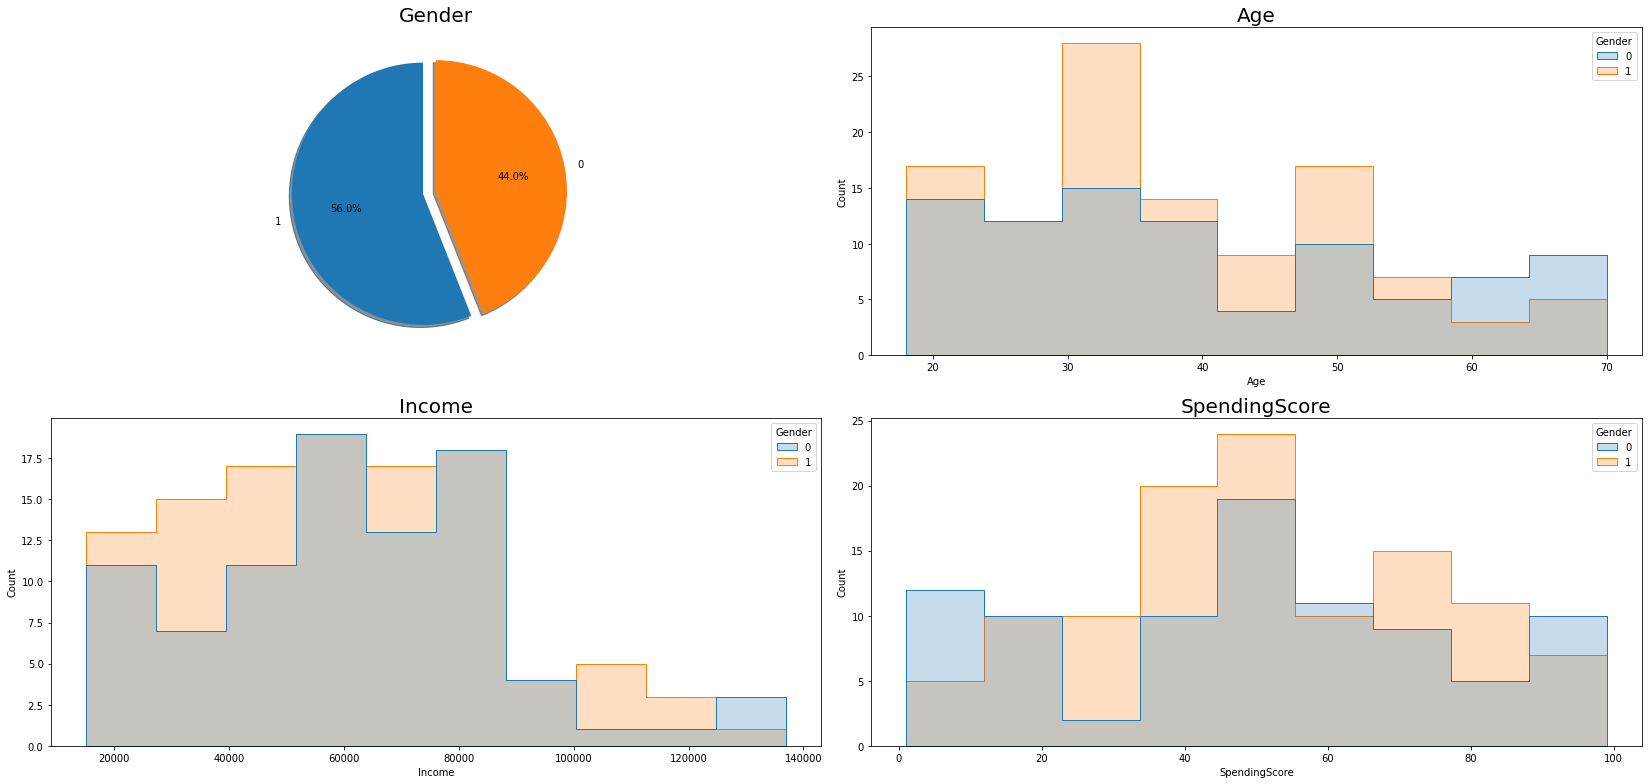

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(23,11))

axes[0,0].pie(cleaned_df.Gender.value_counts().values, labels=cleaned_df.Gender.value_counts().index,
              startangle=90, shadow=True, explode=(0.1, 0.0), autopct='%1.1f%%')
axes[0,0].set_title('Gender', fontsize=20)

sns.histplot(ax=axes[0,1], data=cleaned_df, x='Age', hue='Gender', element='step')
axes[0,1].set_title('Age', fontsize=20)

sns.histplot(ax=axes[1,0], data=cleaned_df, x='Income', hue='Gender', element='step')
axes[1,0].set_title('Income', fontsize=20)

sns.histplot(ax=axes[1,1], data=cleaned_df, x='SpendingScore', hue='Gender', element='step')
axes[1,1].set_title('SpendingScore', fontsize=20)


plt.tight_layout()

Kode di atas digunakan untuk membuat subplots dengan 4 diagram yang menampilkan distribusi dari fitur-fitur dalam dataframe **cleaned_df** dengan menggunakan pie chart dan histogram.

*   Pertama, digunakan fungsi subplots() dari matplotlib untuk membuat subplots dengan 2 kolom dan 2 baris, dan memberikan ukuran dari subplots sebagai (23,11)
*   Kemudian, digunakan fungsi pie() untuk membuat pie chart dari fitur 'Gender', dengan data diambil dari value_counts().values dan labels diambil dari value_counts().index . Kemudian digunakan set_title untuk memberikan judul pada subplot yaitu 'Gender'
*   Selanjutnya, digunakan histplot dari seaborn library untuk membuat histogram dari fitur 'Age','Income','SpendingScore' dengan data diambil dari dataframe cleaned_df dan hue diambil dari fitur 'Gender'
*   Terakhir, digunakan fungsi tight_layout() untuk mengatur posisi subplots yang sudah dibuat.

Kode di atas digunakan untuk menampilkan distribusi dari setiap fitur dalam dataframe cleaned_df dengan menggunakan pie chart dan histogram. Hal ini berguna untuk mengetahui distribusi dari setiap fitur dan mengetahui apakah ada fitur yang tidak balance atau tidak.





### Relasi antara Umur dengan Income (pemasukan) dan SpendingScore

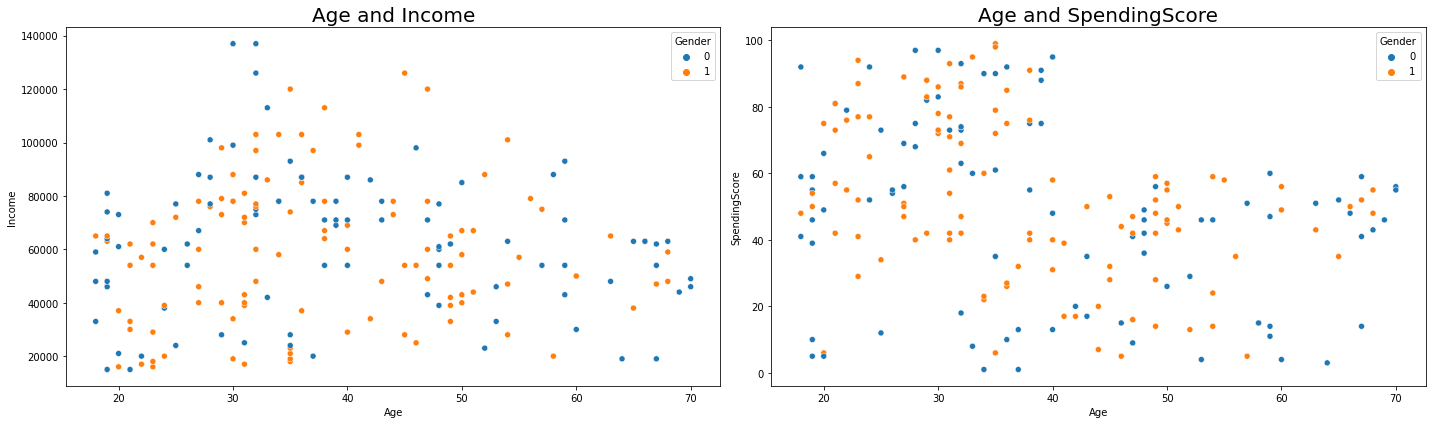

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20, 6))

sns.scatterplot(ax=ax1, data=cleaned_df, x='Age', y='Income', hue='Gender')
ax1.set_title('Age and Income', fontsize=20)

sns.scatterplot(ax=ax2, data=cleaned_df, x='Age', y='SpendingScore', hue='Gender')
ax2.set_title('Age and SpendingScore', fontsize=20)

plt.tight_layout()

Kode di atas digunakan untuk membuat 2 buah scatter plot yang menampilkan hubungan antara fitur 'Age' dengan fitur 'Income' dan fitur 'SpendingScore' dalam dataframe **cleaned_df**.
*   Pertama, digunakan fungsi subplots() dari matplotlib untuk membuat 2 subplots dengan 1 kolom dan 2 baris, dan memberikan ukuran dari subplots sebagai (20, 6)
*   Kemudian, digunakan fungsi scatterplot() dari library seaborn untuk membuat scatter plot dari fitur 'Age' dan 'Income' serta 'Age' dan 'SpendingScore' dengan data diambil dari dataframe cleaned_df dan hue diambil dari fitur 'Gender'
*   Selanjutnya, digunakan fungsi set_title untuk memberikan judul pada subplot yaitu 'Age and Income' dan 'Age and SpendingScore'
*   Terakhir, digunakan fungsi tight_layout() untuk mengatur posisi subplots yang sudah dibuat.

### Rata-rata setiap Subplot terhadap Gender




In [15]:
fig = make_subplots(cols=3, rows=1, subplot_titles=('Average Age', 'Average Income', 'Average SpendingScore'))
group_gender = cleaned_df.groupby('Gender')

fig.add_trace(go.Bar(x=group_gender.Age.mean().index, y=group_gender.Age.mean().values), col=1, row=1)
fig.add_trace(go.Bar(x=group_gender.Income.mean().index, y=group_gender.Income.mean().values), col=2, row=1)
fig.add_trace(go.Bar(x=group_gender.SpendingScore.mean().index, y=group_gender.SpendingScore.mean().values), col=3, row=1)

Kode di atas digunakan untuk membuat subplots dengan 3 bar chart yang menampilkan rata-rata dari fitur 'Age', 'Income', dan 'SpendingScore' dalam dataframe **cleaned_df** berdasarkan fitur 'Gender'.
*   Pertama, digunakan fungsi make_subplots() dari library plotly.subplots untuk membuat subplots dengan 3 kolom dan 1 baris, dan memberikan judul subplot masing-masing sebagai 'Average Age', 'Average Income', 'Average SpendingScore'
*   Kemudian, digunakan fungsi groupby() dari pandas dataframe untuk mengelompokkan dataframe berdasarkan fitur 'Gender'
*   Selanjutnya, digunakan fungsi add_trace() dari objek subplots yang dibuat sebelumnya untuk menambahkan bar chart dari fitur 'Age','Income','SpendingScore' yang di rata-ratakan berdasarkan Gender pada subplots yang sesuai. Fungsi go.Bar() digunakan untuk membuat bar chart dari setiap fitur.

Kode di atas digunakan untuk menampilkan rata-rata dari setiap fitur

# **K-Means Clustering**

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Cluster Umur dan SpendingScore 

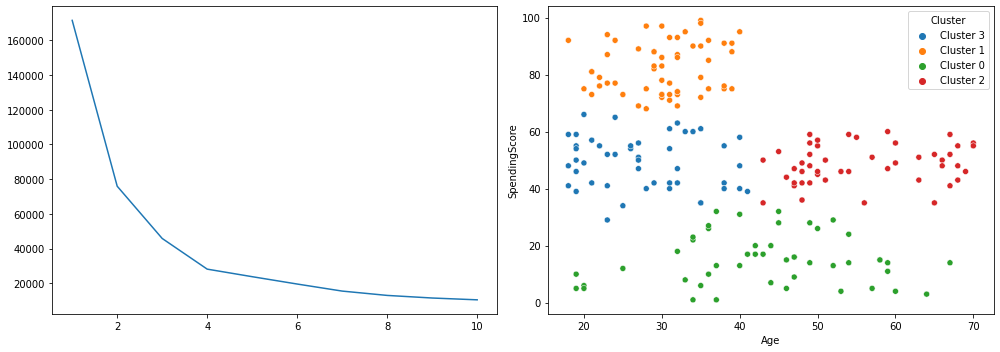

In [17]:
X1 = cleaned_df[['Age', 'SpendingScore']]

inertia = list()
for n in range(1, 11):
    km = KMeans(n_clusters=n)
    km.fit(X1)
    inertia.append(km.inertia_)
    
# Clustering -----------------------------
km = KMeans(n_clusters=4)
cluster = km.fit_predict(X1)

cluster_df = X1.copy()
cluster_df['Cluster'] = ['Cluster ' + str(x) for x in cluster]
    
# Plotting -------------------------------
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(14,5))    

sns.lineplot(ax=ax1, x=[i for i in range(1, 11)], y=inertia)
sns.scatterplot(ax=ax2, data=cluster_df, x='Age', y='SpendingScore', hue='Cluster')

plt.tight_layout()

Kode di atas digunakan untuk melakukan k-means clustering pada dataframe **cleaned_df** dengan menggunakan fitur 'Age' dan 'SpendingScore' dan menampilkan hasilnya dalam bentuk visualisasi.

*   Pertama, mengambil subset dataframe cleaned_df yang hanya berisi fitur 'Age' dan 'SpendingScore' dan menyimpannya dalam variabel X1
*   Kemudian, menggunakan loop untuk mencoba berbagai jumlah klaster dari 1 hingga 10 dan menghitung nilai 'inertia' dari tiap model klaster yang dicoba
*   Selanjutnya, melakukan k-means clustering dengan jumlah klaster sebanyak 4 dan menyimpan hasilnya dalam variabel 'cluster'
*   Membuat dataframe baru yang berisi data dari X1 dengan tambahan kolom 'Cluster' yang berisi nama klaster dari masing-masing data
*   Membuat subplots dengan 2 kolom dan 1 baris, menampilkan grafik lineplot dari 'inertia' dari berbagai jumlah klaster pada subplot pertama dan scatter plot dari data yang sudah dikelompokkan ke dalam klaster pada subplot kedua.
*   Menggunakan fungsi tight_layout() untuk mengatur posisi subplots yang sudah dibuat.

### Cluster Income dan SpendingScore

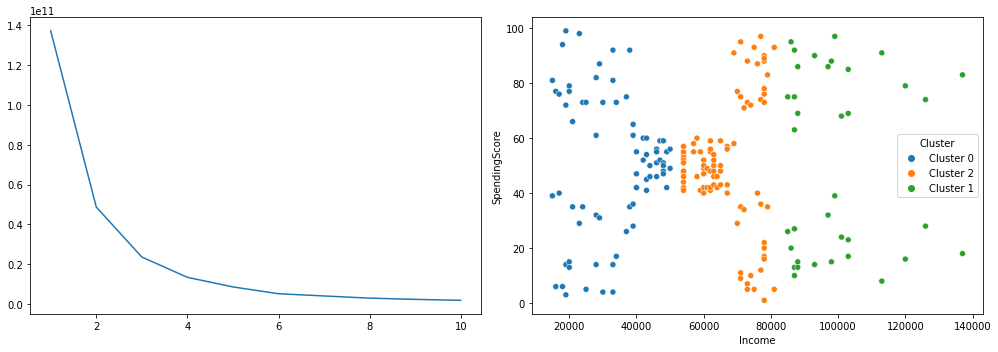

In [18]:
X2 = cleaned_df[['Income', 'SpendingScore']]

inertia = list()
for n in range(1, 11):
    km = KMeans(n_clusters=n)
    km.fit(X2)
    inertia.append(km.inertia_)
    
# Clustering -----------------------------
km = KMeans(n_clusters=3)
cluster = km.fit_predict(X2)

cluster_df = X2.copy()
cluster_df['Cluster'] = ['Cluster ' + str(x) for x in cluster]
    
# Plotting -------------------------------
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(14,5))    

sns.lineplot(ax=ax1, x=[i for i in range(1, 11)], y=inertia)
sns.scatterplot(ax=ax2, data=cluster_df, x='Income', y='SpendingScore', hue='Cluster')

plt.tight_layout()

Kode di atas digunakan untuk melakukan k-means clustering pada dataframe **cleaned_df** dengan menggunakan fitur 'Income' dan 'SpendingScore' dan menampilkan hasilnya dalam bentuk visualisasi.

*   Pertama, mengambil subset dataframe cleaned_df yang hanya berisi fitur 'Income' dan 'SpendingScore' dan menyimpannya dalam variabel X2
*   Kemudian, menggunakan loop untuk mencoba berbagai jumlah klaster dari 1 hingga 10 dan menghitung nilai 'inertia' dari tiap model klaster yang dicoba
*   Selanjutnya, melakukan k-means clustering dengan jumlah klaster sebanyak 3 dan menyimpan hasilnya dalam variabel 'cluster'
*   Membuat dataframe baru yang berisi data dari X2 dengan tambahan kolom 'Cluster' yang berisi nama klaster dari masing-masing data
*   Membuat subplots dengan 2 kolom dan 1 baris, menampilkan grafik lineplot dari 'inertia' dari berbagai jumlah klaster pada subplot pertama dan scatter plot dari data yang sudah dikelompokkan ke dalam klaster pada subplot kedua.
*   Menggunakan fungsi tight_layout() untuk mengatur posisi subplots yang sudah dibuat.

### Cluster Gender dan SpendingScore

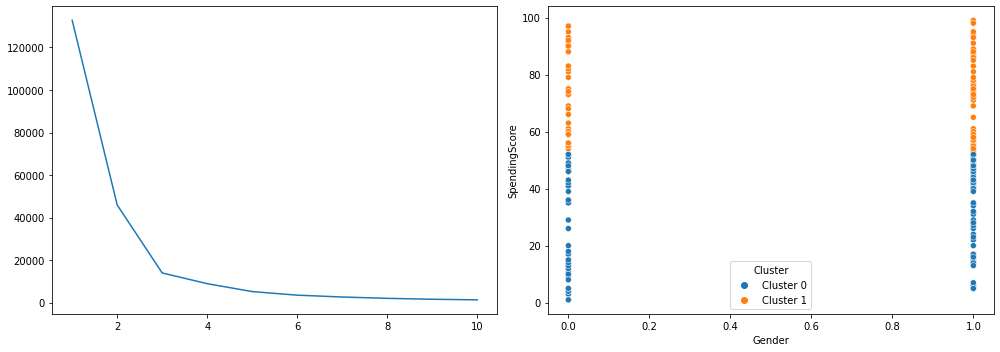

In [19]:
X3 = cleaned_df[['Gender', 'SpendingScore']]

inertia = list()
for n in range(1, 11):
    km = KMeans(n_clusters=n)
    km.fit(X3)
    inertia.append(km.inertia_)
    
# Clustering -----------------------------
km = KMeans(n_clusters=2)
cluster = km.fit_predict(X3)

cluster_df = X3.copy()
cluster_df['Cluster'] = ['Cluster ' + str(x) for x in cluster]
    
# Plotting -------------------------------
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(14,5))    

sns.lineplot(ax=ax1, x=[i for i in range(1, 11)], y=inertia)
sns.scatterplot(ax=ax2, data=cluster_df, x='Gender', y='SpendingScore', hue='Cluster')

plt.tight_layout()

Kode di atas digunakan untuk melakukan k-means clustering pada dataframe **cleaned_df** dengan menggunakan fitur 'Gender' dan 'SpendingScore' dan menampilkan hasilnya dalam bentuk visualisasi.

*   Pertama, mengambil subset dataframe cleaned_df yang hanya berisi fitur 'Gender' dan 'SpendingScore' dan menyimpannya dalam variabel X3
*   Kemudian, menggunakan loop untuk mencoba berbagai jumlah klaster dari 1 hingga 10 dan menghitung nilai 'inertia' dari tiap model klaster yang dicoba
*   Selanjutnya, melakukan k-means clustering dengan jumlah klaster sebanyak 2 dan menyimpan hasilnya dalam variabel 'cluster'
*   Membuat dataframe baru yang berisi data dari X3 dengan tambahan kolom 'Cluster' yang berisi nama klaster dari masing-masing data
*   Membuat subplots dengan 2 kolom dan 1 baris, menampilkan grafik lineplot dari 'inertia' dari berbagai jumlah klaster pada subplot pertama dan scatter plot dari data yang sudah dikelompokkan ke dalam klaster pada subplot kedua.
*   Menggunakan fungsi tight_layout() untuk mengatur posisi subplots yang sudah dibuat.

#**Kesimpulan**

Program ini dibuat untuk melakukan clustering pada data dengan menggunakan metode K-Means. Tujuan dari program ini adalah untuk menentukan jumlah cluster yang optimal dan melakukan pengelompokan data berdasarkan kolom 'Age' dan 'SpendingScore', 'Income' dan 'SpendingScore', serta 'Gender' dan 'SpendingScore'.

Clustering yang optimal antara 'Age' dan 'SpendingScore' adalah 4 Cluster. Seperti yang dapat kita lihat pada scatterplot,berdasarkan kolom keduanya dihasilkan 4 subsplot yang berkoloni (saling berdekatan) dan kita bisa kategorikan sebagai kelompok-kelompok baru.

Berbeda dengan clustering yang kita lakukan pada kolom 'Income' dan 'SpendingScore', clustering yang optimal antara 'Income' dan 'SpendingScore' adalah 3 Cluster. Seperti yang dapat kita lihat pada scatterplot,berdasarkan kolom keduanya dihasilkan 3 subsplot yang berkoloni (saling berdekatan) dan kita bisa kategorikan sebagai kelompok-kelompok baru yaitu pendapatan dengan kategori **tinggi**, **sedang**, dan **rendah**.

Begitu pula dengan clustering yang kita lakukan pada kolom 'Gender' dan 'SpendingScore', clustering yang optimal antara 'Gender' dan 'SpendingScore' adalah 2 Cluster. Seperti yang dapat kita lihat pada scatterplot,berdasarkan kolom keduanya dihasilkan 2 subsplot yang berkoloni (saling berdekatan) dan kita bisa kategorikan sebagai kelompok-kelompok baru yaitu >50 dan <50.

#**Saran dan Pengaplikasian Code**

Program yang saya buat diatas adalah program yang ditujukan untuk mengclusterisasi data dari dataset **Customer pada suatu Mall**, tentu saja program ini juga dapat diaplikasikan pada beberapa dataset yang memiliki kemiripan pada isi dataset, baik dari type data maupun nilai data itu sendiri.

Sebagai contoh, program ini juga dapat dipalikasikan terhadap dataset **Penggunaa KRL** jika didalamnya terdapat salah satu atau lebih kolom seperti 'Gender', 'Age', 'Income', 'Rating' dan sebagainya.

Dan program ini adalah sebagian dari berbagai teknik machine learning yang dapat dilakukan terhadap dataset **Mall Customer**. Program ini bisa disempurnakan dengan klasifikasi sebagaimana pembelajaran yang sudah didapatkan pada mata kuliah **Data Mining**.



##Program dan dataset ini dapat diakses melalui link GDrive yang sudah saya beriakses berikut ini:
https://drive.google.com/drive/folders/1VcGjKgecX-ax4iFmC-fbswR497OE05Sb?usp=share_link 

Terimaksih:)